In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import math
from scipy import stats
import geopandas as gpd
%matplotlib inline
from sklearn import preprocessing

## Input Data as a DataFrame

In [2]:
Data = pd.read_csv('DataInputFinal.csv')

In [3]:
Data.head()

,Unnamed: 0,NTA_name,Asthma Hospitalizations (Adults) by NTA,Children under 5 years old in Poverty,Children under 6 years with elevated blood lead levels by NTA,Foreign-Born,High School Graduation,Limited English,Owner-Occupied Homes,Percent Asian Alone,...,Number of persons 25+ yrs with master's degree,Number of persons 25+ yrs with professional school degree,Number of persons 25+ yrs with doctorate degree,"Workers 16+ years in management, business, science,arts occupations",Workers 16 years and over in service occupations,Workers 16 years and over in sales and office occupations,"Workers 16+ years in natural resources, construction, maint occupation","Workers 16 years and over in production, transport, material moving",Workers 16 years and over in armed forces,tree_dbh
0,0,Allerton-Pelham Gardens,24.1,13.706,20.7,35.260,78.422,15.358,56.914,8.40,...,5.653463,0.949253,1.237634,13.935395,10.360676,10.709136,3.460568,3.595746,0.0,11
1,1,Annadale-Huguenot-Prince's Bay-Eltingville,9.1,12.394,6.8,13.776,91.584,6.436,80.726,3.19,...,7.349466,1.722369,0.747052,21.799380,6.661210,10.655861,4.952675,2.611222,0.0,44
2,2,Arden Heights,15.5,3.632,6.3,15.156,91.614,6.574,87.522,6.29,...,7.126636,0.754000,0.348294,20.702457,7.383073,11.309995,3.655176,3.888648,0.0,26
3,3,Astoria,13.8,15.506,25.4,42.560,84.144,26.334,15.276,15.35,...,10.254995,1.703561,1.381475,28.444418,11.113890,11.248415,3.161353,3.930995,0.0,5
4,4,Auburndale,5.3,3.374,5.4,47.530,85.116,36.186,68.084,44.75,...,7.944284,1.008646,1.176753,18.986551,8.659942,12.420749,4.111431,3.770413,0.0,25


## Drop first column

In [4]:
Data = Data.drop(['Unnamed: 0'], axis=1)
Data.head()

,NTA_name,Asthma Hospitalizations (Adults) by NTA,Children under 5 years old in Poverty,Children under 6 years with elevated blood lead levels by NTA,Foreign-Born,High School Graduation,Limited English,Owner-Occupied Homes,Percent Asian Alone,Percent Black Alone,...,Number of persons 25+ yrs with master's degree,Number of persons 25+ yrs with professional school degree,Number of persons 25+ yrs with doctorate degree,"Workers 16+ years in management, business, science,arts occupations",Workers 16 years and over in service occupations,Workers 16 years and over in sales and office occupations,"Workers 16+ years in natural resources, construction, maint occupation","Workers 16 years and over in production, transport, material moving",Workers 16 years and over in armed forces,tree_dbh
0,Allerton-Pelham Gardens,24.1,13.706,20.7,35.260,78.422,15.358,56.914,8.40,32.406667,...,5.653463,0.949253,1.237634,13.935395,10.360676,10.709136,3.460568,3.595746,0.0,11
1,Annadale-Huguenot-Prince's Bay-Eltingville,9.1,12.394,6.8,13.776,91.584,6.436,80.726,3.19,0.560000,...,7.349466,1.722369,0.747052,21.799380,6.661210,10.655861,4.952675,2.611222,0.0,44
2,Arden Heights,15.5,3.632,6.3,15.156,91.614,6.574,87.522,6.29,1.603333,...,7.126636,0.754000,0.348294,20.702457,7.383073,11.309995,3.655176,3.888648,0.0,26
3,Astoria,13.8,15.506,25.4,42.560,84.144,26.334,15.276,15.35,4.183333,...,10.254995,1.703561,1.381475,28.444418,11.113890,11.248415,3.161353,3.930995,0.0,5
4,Auburndale,5.3,3.374,5.4,47.530,85.116,36.186,68.084,44.75,1.150000,...,7.944284,1.008646,1.176753,18.986551,8.659942,12.420749,4.111431,3.770413,0.0,25


## Rename NTA column for merging purposes (with shapefile)

In [5]:
Data.rename(columns = {'NTA_name':'NTAName'}, inplace = True)

In [6]:
Data.head()

,NTAName,Asthma Hospitalizations (Adults) by NTA,Children under 5 years old in Poverty,Children under 6 years with elevated blood lead levels by NTA,Foreign-Born,High School Graduation,Limited English,Owner-Occupied Homes,Percent Asian Alone,Percent Black Alone,...,Number of persons 25+ yrs with master's degree,Number of persons 25+ yrs with professional school degree,Number of persons 25+ yrs with doctorate degree,"Workers 16+ years in management, business, science,arts occupations",Workers 16 years and over in service occupations,Workers 16 years and over in sales and office occupations,"Workers 16+ years in natural resources, construction, maint occupation","Workers 16 years and over in production, transport, material moving",Workers 16 years and over in armed forces,tree_dbh
0,Allerton-Pelham Gardens,24.1,13.706,20.7,35.260,78.422,15.358,56.914,8.40,32.406667,...,5.653463,0.949253,1.237634,13.935395,10.360676,10.709136,3.460568,3.595746,0.0,11
1,Annadale-Huguenot-Prince's Bay-Eltingville,9.1,12.394,6.8,13.776,91.584,6.436,80.726,3.19,0.560000,...,7.349466,1.722369,0.747052,21.799380,6.661210,10.655861,4.952675,2.611222,0.0,44
2,Arden Heights,15.5,3.632,6.3,15.156,91.614,6.574,87.522,6.29,1.603333,...,7.126636,0.754000,0.348294,20.702457,7.383073,11.309995,3.655176,3.888648,0.0,26
3,Astoria,13.8,15.506,25.4,42.560,84.144,26.334,15.276,15.35,4.183333,...,10.254995,1.703561,1.381475,28.444418,11.113890,11.248415,3.161353,3.930995,0.0,5
4,Auburndale,5.3,3.374,5.4,47.530,85.116,36.186,68.084,44.75,1.150000,...,7.944284,1.008646,1.176753,18.986551,8.659942,12.420749,4.111431,3.770413,0.0,25


## X is Data df w/o Neighborhood name

In [7]:
X = Data.iloc[:,1:]

In [8]:
X.head()

,Asthma Hospitalizations (Adults) by NTA,Children under 5 years old in Poverty,Children under 6 years with elevated blood lead levels by NTA,Foreign-Born,High School Graduation,Limited English,Owner-Occupied Homes,Percent Asian Alone,Percent Black Alone,Percent Hispanic Alone,...,Number of persons 25+ yrs with master's degree,Number of persons 25+ yrs with professional school degree,Number of persons 25+ yrs with doctorate degree,"Workers 16+ years in management, business, science,arts occupations",Workers 16 years and over in service occupations,Workers 16 years and over in sales and office occupations,"Workers 16+ years in natural resources, construction, maint occupation","Workers 16 years and over in production, transport, material moving",Workers 16 years and over in armed forces,tree_dbh
0,24.1,13.706,20.7,35.260,78.422,15.358,56.914,8.40,32.406667,32.126667,...,5.653463,0.949253,1.237634,13.935395,10.360676,10.709136,3.460568,3.595746,0.0,11
1,9.1,12.394,6.8,13.776,91.584,6.436,80.726,3.19,0.560000,6.866667,...,7.349466,1.722369,0.747052,21.799380,6.661210,10.655861,4.952675,2.611222,0.0,44
2,15.5,3.632,6.3,15.156,91.614,6.574,87.522,6.29,1.603333,12.420000,...,7.126636,0.754000,0.348294,20.702457,7.383073,11.309995,3.655176,3.888648,0.0,26
3,13.8,15.506,25.4,42.560,84.144,26.334,15.276,15.35,4.183333,27.256667,...,10.254995,1.703561,1.381475,28.444418,11.113890,11.248415,3.161353,3.930995,0.0,5
4,5.3,3.374,5.4,47.530,85.116,36.186,68.084,44.75,1.150000,12.126667,...,7.944284,1.008646,1.176753,18.986551,8.659942,12.420749,4.111431,3.770413,0.0,25


## Input shapefile

In [9]:
NTA_shapefile = gpd.read_file('nynta.shp')

In [10]:
NTA_shapefile.head()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry
0,3,Brooklyn,047,BK88,Borough Park,39247.227831,5.400502e+07,"POLYGON ((990897.9000244141 169268.1207885742,..."
1,4,Queens,081,QN51,Murray Hill,33266.904797,5.248828e+07,"POLYGON ((1038593.459228516 221913.3552246094,..."
2,4,Queens,081,QN27,East Elmhurst,19816.711908,1.972685e+07,"POLYGON ((1022728.274841309 217530.8082275391,..."
3,4,Queens,081,QN07,Hollis,20976.335574,2.288777e+07,"POLYGON ((1051539.66003418 201007.0130004883, ..."
4,1,Manhattan,061,MN06,Manhattanville,17040.685413,1.064708e+07,"POLYGON ((999174.2606201172 238490.1047973633,..."


## Gaussian Mixture Clustering

build GM model

In [11]:
from sklearn.mixture import GaussianMixture
GM=GaussianMixture(n_components=3,random_state=999)
GM.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=999, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

plot GM model 

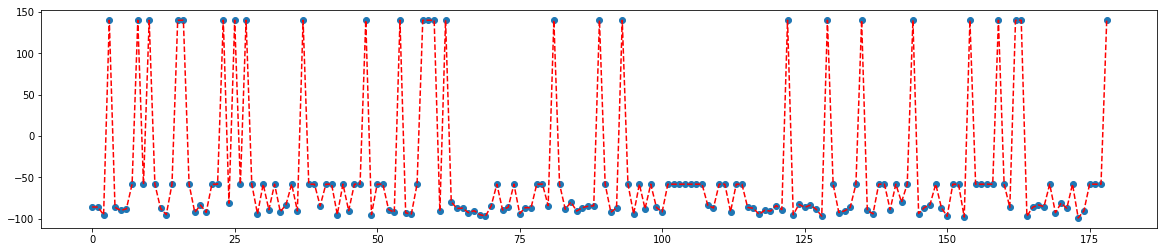

In [12]:
# score_samples function gives the log of the probability density of each data record given its cluster.
# Note that probability densities can exceed 1 (unlike probabilities of discrete data).
import matplotlib.pylab as plt
plt.figure(figsize=(20,4))
plt.scatter(range(len(X)),GM.score_samples(X)) #gives each data record's log-likelihood. allows for direct anamoly detection
plt.plot(GM.score_samples(X),"r--")
plt.show()

In [13]:
# 5 most anomalous data points by log-likelihood (i.e. log probability density)
pd.DataFrame(GM.score_samples(X)).sort_values(0)[:5]

,0
173,-99.275774
153,-98.271507
150,-97.359404
164,-97.248504
69,-97.208857


In [14]:
## see which neighborhoods the scores correspond to
Data.iloc[[173, 153, 150, 164, 69],:]

#Model_I[6]

,NTAName,Asthma Hospitalizations (Adults) by NTA,Children under 5 years old in Poverty,Children under 6 years with elevated blood lead levels by NTA,Foreign-Born,High School Graduation,Limited English,Owner-Occupied Homes,Percent Asian Alone,Percent Black Alone,...,Number of persons 25+ yrs with master's degree,Number of persons 25+ yrs with professional school degree,Number of persons 25+ yrs with doctorate degree,"Workers 16+ years in management, business, science,arts occupations",Workers 16 years and over in service occupations,Workers 16 years and over in sales and office occupations,"Workers 16+ years in natural resources, construction, maint occupation","Workers 16 years and over in production, transport, material moving",Workers 16 years and over in armed forces,tree_dbh
173,Williamsburg,14.1,65.670,114.8,11.766,69.858,34.618,13.582,0.266667,3.393333,...,1.027554,0.451270,0.073179,9.565094,3.558325,10.309079,0.911687,2.512476,0.000000,5
153,Stuyvesant Town-Cooper Village,4.4,2.442,14.5,19.360,97.404,4.748,0.068,13.103333,3.473333,...,18.464473,9.332258,3.279782,43.609466,8.750737,9.243867,0.367522,0.883913,0.000000,2
150,Starrett City,52.2,40.300,5.1,30.544,77.746,22.178,2.186,2.680000,51.540000,...,3.814929,0.472925,0.472925,11.176795,9.758020,8.536297,1.213841,3.475999,0.000000,5
164,West Brighton,13.9,7.142,13.8,63.808,93.428,45.626,42.602,0.696667,0.836667,...,17.383516,2.557352,1.314284,16.172821,9.912165,11.737920,2.537929,3.463755,0.000000,3
69,Grasmere-Arrochar-Ft. Wadsworth,20.5,9.798,11.7,33.488,86.396,19.134,61.648,12.620000,5.730000,...,8.364454,1.266763,0.929384,19.408844,8.670005,8.421745,3.895773,3.876676,0.305551,13


In [15]:
## create an array of the Gaussian Mixture scores
GM_scores = GM.score_samples(X)


In [16]:
## create a df with just the NTA, Y-var, and GM scores
Neighborhood_COPD = Data[['NTAName', 'Asthma Hospitalizations (Adults) by NTA']]
Neighborhood_COPD['GMscore'] = GM_scores
Neighborhood_COPD.iloc[[173, 153, 150, 164, 69],:]

C:\Users\aniha\Anaconda3\envs\TwentySevenVersion\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,NTAName,Asthma Hospitalizations (Adults) by NTA,GMscore
173,Williamsburg,14.1,-99.275774
153,Stuyvesant Town-Cooper Village,4.4,-98.271507
150,Starrett City,52.2,-97.359404
164,West Brighton,13.9,-97.248504
69,Grasmere-Arrochar-Ft. Wadsworth,20.5,-97.208857


In [17]:
# find which neighborhoods had the 5 largest log-likelihood vals
GM_df = pd.DataFrame(GM_scores)
GM_df.sort_values(0,ascending=False)[:5]

,0
89,140.124316
8,140.124306
27,140.124300
159,140.124299
10,140.124295


In [18]:
## DF of Neighborhoods with (High log-likelihood scores)
GM_best = Data[['NTAName', 'Asthma Hospitalizations (Adults) by NTA']]
GM_best['GMscore'] = GM_scores
GM_best.iloc[[89, 8, 27, 159, 10]]

C:\Users\aniha\Anaconda3\envs\TwentySevenVersion\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,NTAName,Asthma Hospitalizations (Adults) by NTA,GMscore
89,Lenox Hill-Roosevelt Island,5.2,140.124316
8,Bay Ridge,10.0,140.124306
27,Central Harlem North-Polo Grounds,48.4,140.124300
159,Upper West Side,14.1,140.124299
10,Bedford,30.9,140.124295


## K-means -- Data Scaled 'normalized'

In [19]:
# make each column have mean = 0 and std dev = 1
# Normalizing data through pre-processing package
# X_scaled is a df that's X normalized with the package

X_scaled = preprocessing.scale(X)

C:\Users\aniha\Anaconda3\envs\TwentySevenVersion\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """


In [20]:
from sklearn.cluster import KMeans
KM_scaled=KMeans(n_clusters=3,random_state=999)
scor_scaled=KM_scaled.fit_predict(X_scaled)

# distance to each cluster center
res_scaled=pd.DataFrame(KM_scaled.transform(X_scaled))
res_scaled.head()

#create a df that shows cluster labels as column with scores as distance
res_scaled=pd.concat((res_scaled,pd.DataFrame(KM_scaled.fit_predict(X_scaled))),axis=1)
res_scaled.columns=list(range(3))+["cluster"]
res_scaled.loc[:,"score"]=res_scaled.apply(lambda x: x[int(x["cluster"])],axis=1)

# find data records farthest from cluster centers
res_scaled.sort_values("score",ascending=False)[:5]


## create a df that shows just the NTA, Asthma (Y-var), K-means score, and cluster label
x_scaled = res_scaled.loc[:,"score"]
df_Nscaled = Data
df_Nscaled = df_Nscaled.reset_index()
df_Nscaled['K-means'] = x_scaled
df_Nscaled['cluster'] = (res_scaled.loc[:,"cluster"])
df_Kscaled = df_Nscaled[['NTAName','Asthma Hospitalizations (Adults) by NTA', 'K-means', 'cluster']]
df_Kscaled.nlargest(5, 'K-means')

,NTAName,Asthma Hospitalizations (Adults) by NTA,K-means,cluster
173,Williamsburg,14.1,14.744314,0
102,Morningside Heights,16.0,11.642016,1
60,Flushing,10.2,10.744287,2
164,West Brighton,13.9,9.781044,2
137,Rossville-Woodrow,8.4,9.697854,2


In [21]:
#res_scaled.sort_values("score",ascending=False)[:5]

## Vidualize cluster labels on any 2 columns (NOT Ashtma)

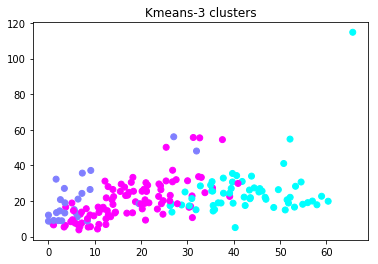

In [22]:
x_scaled_second2cols = Data.iloc[:,2:4]
x_scaled_second2cols['cluster'] = (res_scaled.loc[:,"cluster"])
#plt.subplot(1,2,2)
plt.scatter(x_scaled_second2cols.iloc[:,0], x_scaled_second2cols.iloc[:,1], c=x_scaled_second2cols['cluster'], cmap=plt.cm.cool)
#plt.xlabel('x1')
#plt.ylabel('x2')
#plt.xticks(())
#plt.yticks(())
plt.title("Kmeans-{} clusters".format(3))
plt.show()

## Silhoutte Scores

In [23]:
## Perform silhouette scores to see how many clusters are appropriate for the data
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters: #try different numbers of clusters
    km_scaled = KMeans(n_clusters=n_clusters, random_state=999)
    cluster_labels = km_scaled.fit_predict(X_scaled)
    #report average Silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.221680323149
For n_clusters =3, the average silhouette_score is :0.237635393581
For n_clusters =4, the average silhouette_score is :0.183242816538
For n_clusters =5, the average silhouette_score is :0.182086559278
For n_clusters =6, the average silhouette_score is :0.153411413571


## Plot cluster lab distribution on 'heatmap'

In [24]:
# create new shape file that has the cluster labels attached to the neighborhood along with polygon 
KMeansMap = NTA_shapefile.merge(df_Kscaled, on='NTAName')

C:\Users\aniha\Anaconda3\envs\TwentySevenVersion\lib\site-packages\geopandas\plotting.py:400: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


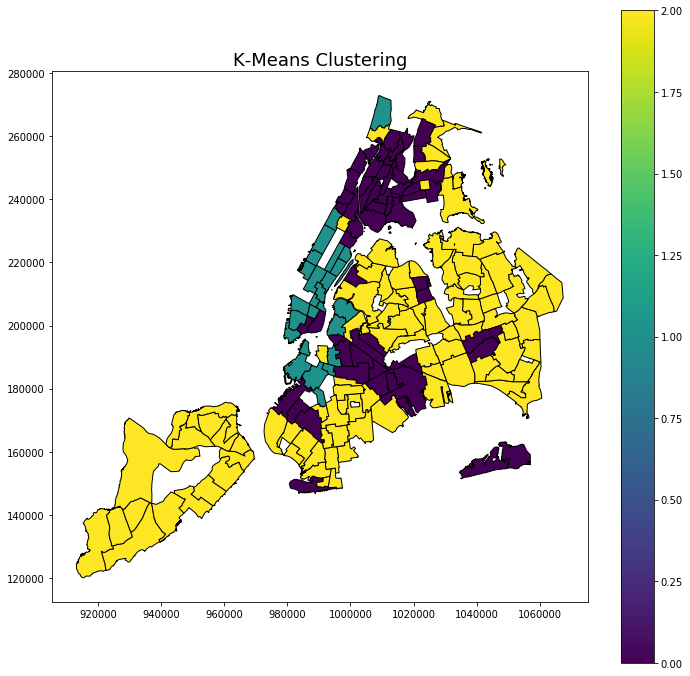

In [25]:
## plot cluster label distribution throughout NYC
f, ax = plt.subplots(1, figsize=(12, 12))
ax.set_title("K-Means Clustering", fontsize=18)
KMeansMap.plot(axes=ax, column='cluster', legend = True, cmap='viridis', edgecolor = 'black')

## Find the mean of Asthma Hospitalization rates for each cluster grouping

In [26]:
df_mean = df_Nscaled.drop(['index'], axis=1)

df_N0 = df_mean[df_mean.cluster==0]
df_N1 = df_mean[df_mean.cluster==1]
df_N2 = df_mean[df_mean.cluster==2]

print('N0: {}\nN1: {}\nN2: {} '.format(df_N0['Asthma Hospitalizations (Adults) by NTA'].mean(),
df_N1['Asthma Hospitalizations (Adults) by NTA'].mean(),
df_N2['Asthma Hospitalizations (Adults) by NTA'].mean()))

N0: 41.7706896552
N1: 8.556
N2: 15.6854166667 


## K-Means -- Data modeled as-is

In [27]:
# # # normalization (from ADS regularization notebook) 
# # # learn standardization parameters from training set

# #Here, we are normalizing through taking means/stds/sigma

# mu = X.mean()
# # #mu_y = y_train.mean()
# sigma = X.std()
# # #sigma_y = y_train.std()
# # # apply standardization to training and testing set
# X_normal=(X-mu)/sigma
# # # X_test = (X_test - mu)/sigma
# # # y_train=(y_train-mu_y)/sigma_y
# # # y_test = (y_test - mu_y)/sigma_y

In [28]:
from sklearn.cluster import KMeans
KM=KMeans(n_clusters=2,random_state=999)
scor=KM.fit_predict(X)

# distance to each cluster center
res=pd.DataFrame(KM.transform(X))
res.head()

,0,1
0,1606.487655,37347.851773
1,2771.223628,41723.674095
2,5556.638263,44509.989753
3,45625.557661,6671.736676
4,10863.340156,49817.226957


In [29]:
res=pd.concat((res,pd.DataFrame(KM.fit_predict(X))),axis=1)
res.columns=list(range(2))+["cluster"]
res.loc[:,"score"]=res.apply(lambda x: x[int(x["cluster"])],axis=1)

# find data records farthest from cluster centers
res.sort_values("score",ascending=False)[:5]

,0,1,cluster,score
159,103410.879177,64456.878729,1,64456.878729
58,75822.546614,36868.528049,1,36868.528049
16,75807.570088,36853.599021,1,36853.599021
37,73586.896251,34632.892035,1,34632.892035
81,73364.216340,34410.211734,1,34410.211734


In [30]:
x = res.loc[:,"score"]
df_N = Data
df_N = df_N.reset_index()
df_N['K-means'] = x
df_N['cluster'] = (res.loc[:,"cluster"])
df_K = df_N[['NTAName','Asthma Hospitalizations (Adults) by NTA', 'K-means', 'cluster']]
df_K.nlargest(5, 'K-means')

,NTAName,Asthma Hospitalizations (Adults) by NTA,K-means,cluster
159,Upper West Side,14.1,64456.878729,1
58,Flatbush,19.8,36868.528049,1
16,Borough Park,7.2,36853.599021,1
37,Crown Heights North,38.8,34632.892035,1
81,Jackson Heights,9.9,34410.211734,1


## Attempt to plot data with cluster labels

In [31]:
# create a df that's just the first 2 numeric cols of the Data df (not Asthma Y-var)
# to be able to plot the cluster labels
x_normal2cols = Data.iloc[:,2:4]

In [32]:
# add the cluster label to the df
x_normal2cols['cluster'] = (res.loc[:,"cluster"])

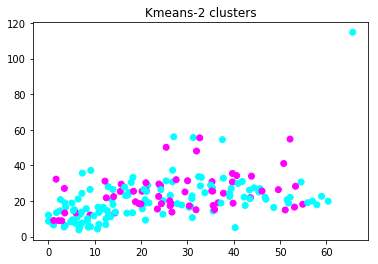

In [33]:
#plt.subplot(1,2,2)
plt.scatter(x_normal2cols.iloc[:,0], x_normal2cols.iloc[:,1], c=x_normal2cols['cluster'], cmap=plt.cm.cool)
#plt.xlabel('x1')
#plt.ylabel('x2')
#plt.xticks(())
#plt.yticks(())
plt.title("Kmeans-{} clusters".format(2))
plt.show()

## Silhouette Scores

In [34]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4]
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=999)
    cluster_labels = km.fit_predict(X)
    #report average Silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.624523325883
For n_clusters =3, the average silhouette_score is :0.602969686446
For n_clusters =4, the average silhouette_score is :0.580694175619


In [35]:
K_Normal = NTA_shapefile.merge(df_K, on='NTAName')

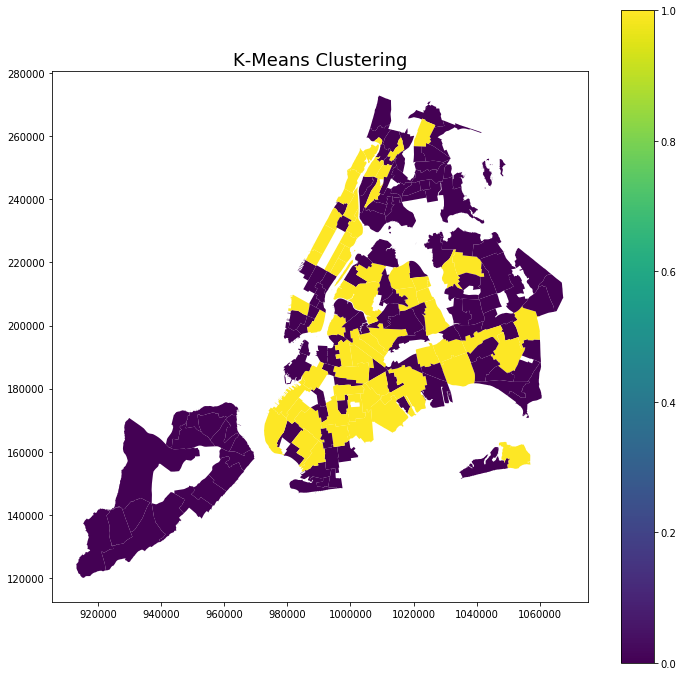

In [36]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax.set_title("K-Means Clustering", fontsize=18)
K_Normal.plot(axes=ax, column='cluster', legend = True, cmap='viridis')

### Isolation Forest Modeling

In [37]:
from sklearn.ensemble import IsolationForest

In [38]:
clf = IsolationForest(max_samples=50, random_state=123)
clf.fit_predict(X)
IsoForest = (clf.score_samples(X))

C:\Users\aniha\Anaconda3\envs\TwentySevenVersion\lib\site-packages\sklearn\ensemble\iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\aniha\Anaconda3\envs\TwentySevenVersion\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\aniha\Anaconda3\envs\TwentySevenVersion\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [39]:
#Iso_score = GM.score_samples(Data_Numeric.iloc[:,1:32])
df_I = Data
df_I = df_I.reset_index()
df_I['IsoFoScore'] = IsoForest
df_I = df_I[['NTAName', 'Asthma Hospitalizations (Adults) by NTA', 'IsoFoScore']]
df_I.nsmallest(5, 'IsoFoScore')

,NTAName,Asthma Hospitalizations (Adults) by NTA,IsoFoScore
156,Turtle Bay-East Midtown,3.5,-0.546144
68,Gramercy,6.8,-0.535341
173,Williamsburg,14.1,-0.530193
168,West Village,2.8,-0.529252
158,Upper East Side-Carnegie Hill,3.9,-0.526998


## LOF Clustering

In [40]:
from sklearn.neighbors import LocalOutlierFactor

# fit the model
clf_LOF = LocalOutlierFactor(n_neighbors=5)
y_pred = clf_LOF.fit_predict(X)
LOF = (clf_LOF.negative_outlier_factor_)

C:\Users\aniha\Anaconda3\envs\TwentySevenVersion\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


In [41]:
# create df of the LOF results, 5 worst performing results
df_LOF = Data
df_LOF = df_LOF.reset_index()
df_LOF['LOF_Score'] = LOF
df_LOF = df_LOF[['NTAName', 'Asthma Hospitalizations (Adults) by NTA', 'LOF_Score']]
df_LOF.nsmallest(5, 'LOF_Score')

,NTAName,Asthma Hospitalizations (Adults) by NTA,LOF_Score
159,Upper West Side,14.1,-2.760888
150,Starrett City,52.2,-2.273142
171,Whitestone,6.6,-1.821921
147,Spuyten Duyvil-Kingsbridge,16.3,-1.717953
164,West Brighton,13.9,-1.693636


## reshape X to be able to plot LOF graph

In [42]:
X_reshape = X.values.reshape(-2,2)

In [43]:
(X_reshape)

array([[24.1       , 13.706     ],
       [20.7       , 35.26      ],
       [78.422     , 15.358     ],
       ...,
       [ 4.2062165 , 13.94408105],
       [ 0.69591305,  0.63197757],
       [ 0.        ,  2.        ]])

In [44]:
len(X_reshape)

5549

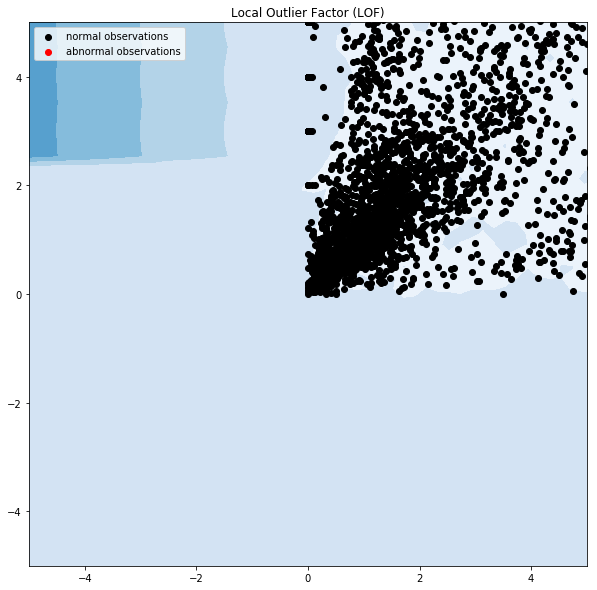

In [45]:
# fit the model
clf_LOF = LocalOutlierFactor(n_neighbors=5)
y_pred = clf_LOF.fit_predict(X_reshape)
#y_pred_outliers = y_pred[200:]

# plot the level sets of the decision function
xx, yy = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
Z = clf_LOF._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))


plt.title("Local Outlier Factor (LOF)")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a = plt.scatter(X_reshape[:5549, 0],X_reshape[:5549, 1], c='black')
b = plt.scatter(X_reshape[5549:, 0], X_reshape[5549:, 1], c='red')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a, b],
           ["normal observations",
            "abnormal observations"],
           loc="upper left")
plt.show()

## DBSCAN -- Did not use

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import sklearn.datasets as data
import sklearn.cluster as cluster
import time
from sklearn import cluster, datasets

In [ ]:
def visuDB(data,eps,min_samples):
    db = DBSCAN(eps, min_samples).fit(data)
    plt.figure(figsize=(6,6))
    plt.scatter(X_reshape[:,0],X_reshape[:,1],c=db.labels_,s=10)
    print "Proportion of unclustered points=",(1*(db.labels_ < 0)).mean()
    plt.show()

In [ ]:
visuDB(X_reshape,0.5,7)

In [ ]:
# your code here

total_num_samples = len(X_reshape[:,0])
max_eps = max(np.max(X_reshape[:,0])-np.min(X_reshape[:,0]),np.max(X_reshape[:,1])-np.min(X_reshape[:,1]))

for eps in np.logspace(np.log10(max_eps)-3,np.log10(max_eps),10):
    for min_samples in np.linspace(40,800,40,endpoint=True):
        db = DBSCAN(eps, min_samples).fit(X_reshape)
        num_clustered = len(db.labels_[db.labels_ >= 0])
        if (num_clustered > 0) & (num_clustered < 0.1*total_num_samples):
            dbb=db
            plt.figure(figsize=(8,8))
            print "eps =", eps, ", min_samples =", min_samples, ", num_detected_points =", len(db.labels_[db.labels_ >= 0])
            
            # evaluation
            num_correct_clustered = len(db.labels_[0:100][db.labels_[0:100] >= 0])
            print "precision=",1.0*num_correct_clustered/num_clustered,"recall=",1.0*num_correct_clustered/100.0
            
            plt.scatter(X_reshape[:,0],X_reshape[:,1],c=db.labels_,s=10,cmap=plt.cm.cool)
            plt.show()